In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, r2_score
from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing


import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv("adult.csv")
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
df['income'].value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

In [4]:
df.iloc[21125]

age                               25
workclass                    Private
fnlwgt                        179462
education                    7th-8th
educational-num                    4
marital-status         Never-married
occupation         Handlers-cleaners
relationship               Unmarried
race                           White
gender                          Male
capital-gain                       0
capital-loss                       0
hours-per-week                    40
native-country         United-States
income                         <=50K
Name: 21125, dtype: object

<div style="text-align:center; background-color:#6A0DAD; padding:20px; border-radius:25px;">
  <h1 style="font-size:36px; color:#FFFFFF;"><b>1.EDA and Data Cleaning</b></h1>
</div>

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [6]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [7]:
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

Note : Data is seems to you that it has no null values but actually its contains a lot of null values 

In [8]:
df.nunique()

age                   74
workclass              9
fnlwgt             28523
education             16
educational-num       16
marital-status         7
occupation            15
relationship           6
race                   5
gender                 2
capital-gain         123
capital-loss          99
hours-per-week        96
native-country        42
income                 2
dtype: int64

In [9]:
def convert_marital_status(status):
    if status in ['Married-civ-spouse', 'Married-spouse-absent', 'Married-AF-spouse']:
        return 'married'
    elif status in ['Never-married', 'Separated', 'Widowed']:
        return 'single'
    else:
        return 'divorced'

df['marital-status'] = df['marital-status'].apply(convert_marital_status)

df['native-country'] = df['native-country'].replace('Outlying-US(Guam-USVI-etc)' , 'US Minor Islands')

df = df.drop(['capital-gain', 'capital-loss', 'fnlwgt'], axis=1)

income_mapping = {'<=50K': 0, '>50K': 1}
df['income'] = df['income'].map(income_mapping)

<div style="text-align:center; background-color:#6A0DAD; padding:20px; border-radius:25px;">
  <h1 style="font-size:36px; color:#FFFFFF;"><b>2.Data Preprocessing</b></h1>
</div>

In [10]:
def fill_missing_categorical(df, column):
    df[column] = df[column].replace('?', np.nan)

    if df[column].notna().all():
        return df

    known = df[df[column].notna()]
    unknown = df[df[column].isna()]

    le = LabelEncoder()
    known[column] = le.fit_transform(known[column])
    X_known = known.drop(column, axis=1)
    y_known = known[column]

    categorical_cols = X_known.select_dtypes(include=['object']).columns

    le_cat = preprocessing.LabelEncoder()
    X_known[categorical_cols] = X_known[categorical_cols].apply(lambda col: le_cat.fit_transform(col.astype(str)))

    clf = RandomForestClassifier()
    clf.fit(X_known, y_known)

    X_unknown = unknown.drop(column, axis=1)

    X_unknown[categorical_cols] = X_unknown[categorical_cols].apply(lambda col: le_cat.fit_transform(col.astype(str)))

    unknown[column] = clf.predict(X_unknown)

    df = pd.concat([known, unknown], axis=0)

    df[column] = le.inverse_transform(df[column])
    
    return df

In [11]:
df = fill_missing_categorical(df, 'native-country')
df = fill_missing_categorical(df, 'occupation')
df = fill_missing_categorical(df, 'workclass')

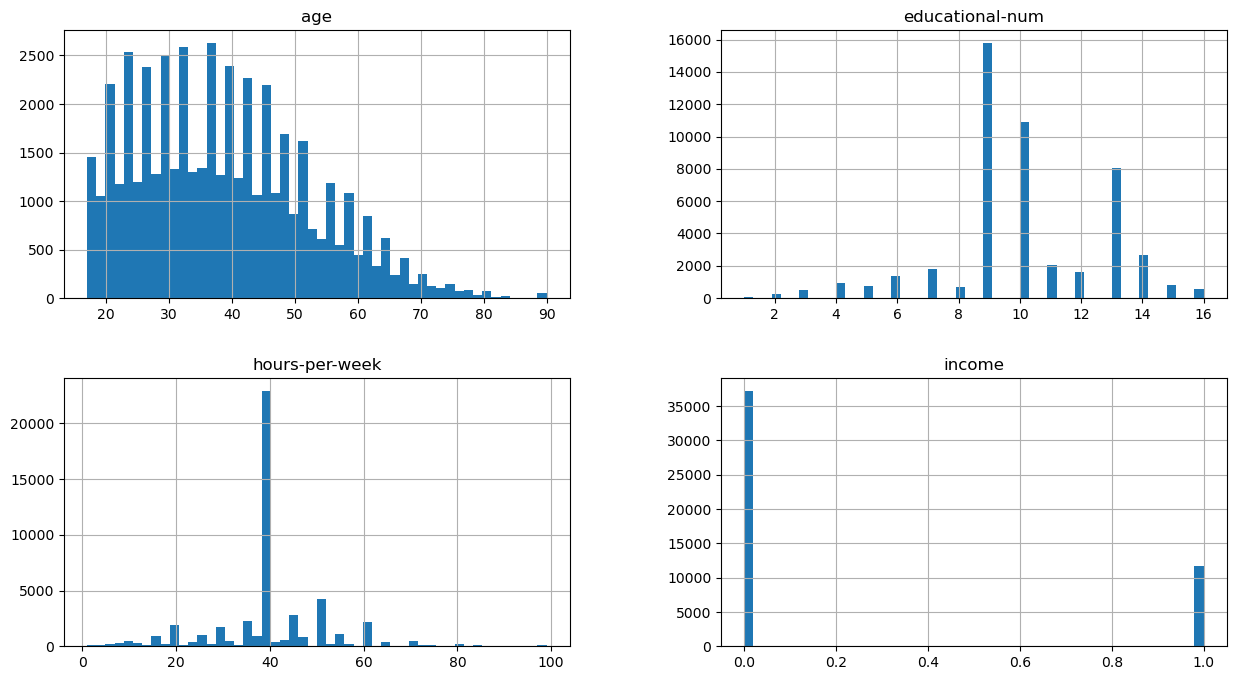

In [12]:
df.hist(figsize=(15, 8),bins = 50)
plt.show()

<Figure size 500x200 with 0 Axes>

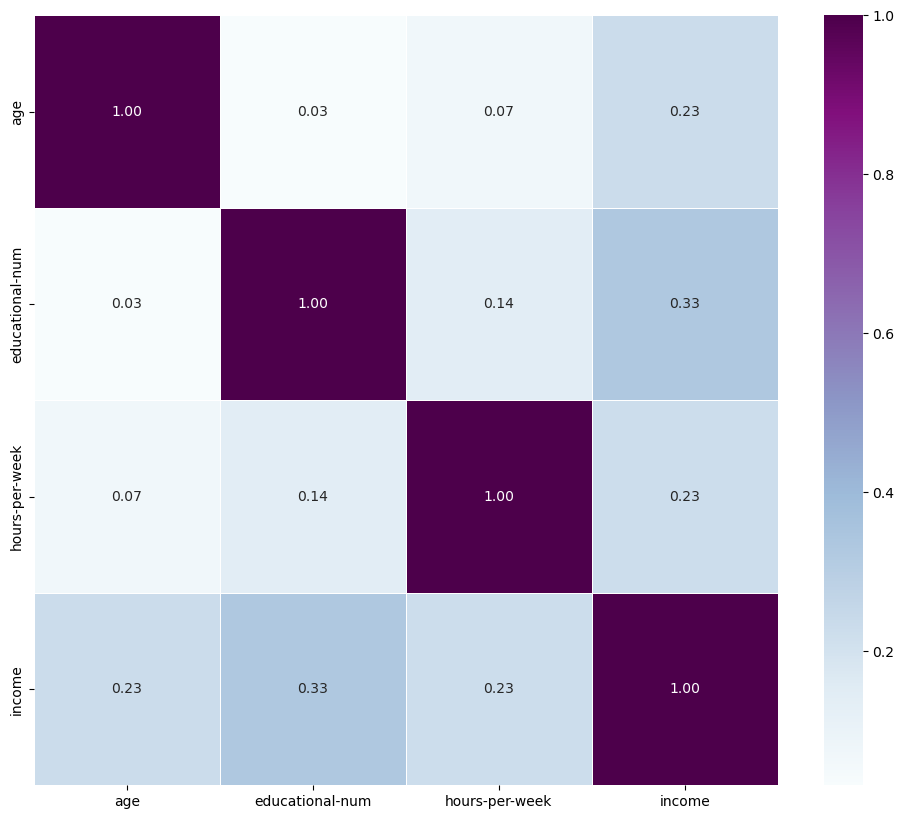

In [13]:
plt.figure(figsize=(5, 2))
numeric_columns = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_columns.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='BuPu', fmt=".2f", linewidths=.5)
plt.show()

<div style="text-align:center; background-color:#add8e6; padding:20px; border-radius:25px;">
  <h1 style="font-size:36px; color:#FFFFFF;"><b>💡The best features for our Model is (workclass, educational-num, marital-status, occupation, gender, hours-per-week)💡</b></h1>
</div>

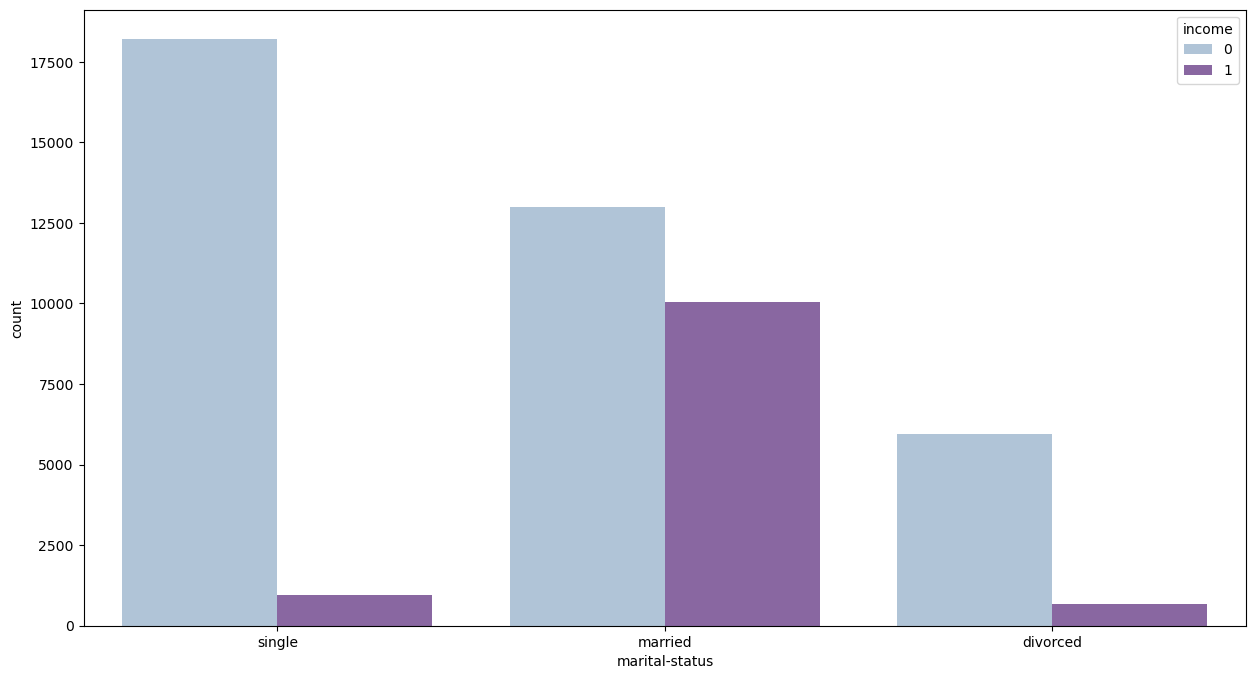

In [14]:
plt.figure(figsize=(15, 8))
sns.countplot(data=df, x='marital-status', hue='income', palette="BuPu")
plt.show()

<div style="text-align:center; background-color:#6A0DAD; padding:20px; border-radius:25px;">
  <h1 style="font-size:36px; color:#FFFFFF;"><b>3.Feature Scaling & Handling Outliers</b></h1>
</div>

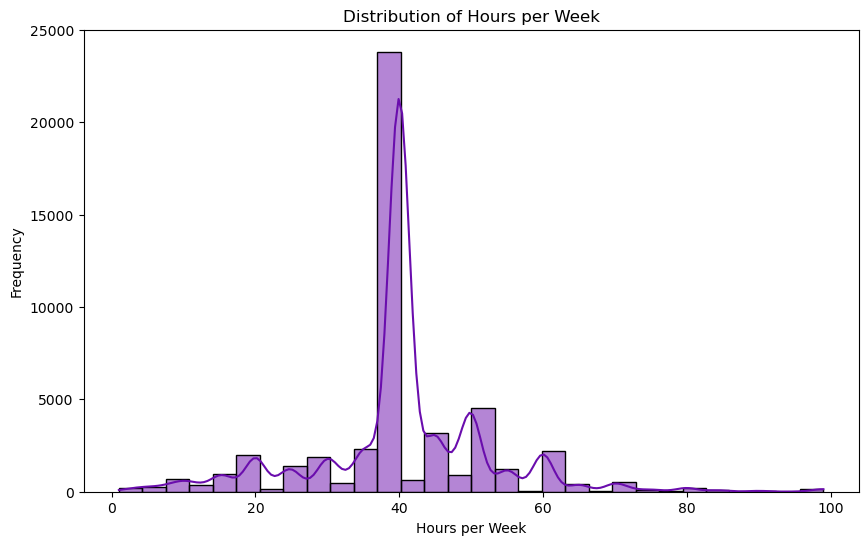

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(df['hours-per-week'], kde=True, bins=30, color='#6A0DAD')
plt.title('Distribution of Hours per Week')
plt.xlabel('Hours per Week')
plt.ylabel('Frequency')
plt.show()

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48842 entries, 0 to 48806
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   education        48842 non-null  object
 3   educational-num  48842 non-null  int64 
 4   marital-status   48842 non-null  object
 5   occupation       48842 non-null  object
 6   relationship     48842 non-null  object
 7   race             48842 non-null  object
 8   gender           48842 non-null  object
 9   hours-per-week   48842 non-null  int64 
 10  native-country   48842 non-null  object
 11  income           48842 non-null  int64 
dtypes: int64(4), object(8)
memory usage: 4.8+ MB


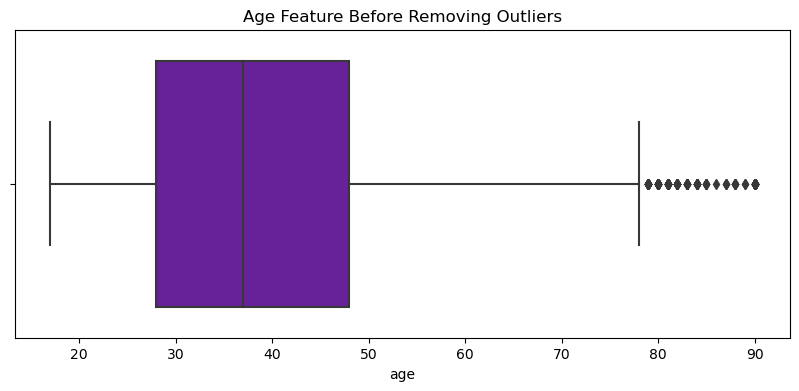

In [17]:
plt.figure(figsize=(10, 4))
sns.boxplot(x=df['age'], color = '#6A0DAD')
plt.title('Age Feature Before Removing Outliers')
plt.show()

In [18]:
#Remove the Outliers
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['age'] < Q1 - 1.5 * IQR) | (df['age'] > Q3 + 1.5 * IQR)]

df.drop(outliers.index, inplace=True)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48626 entries, 0 to 46650
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48626 non-null  int64 
 1   workclass        48626 non-null  object
 2   education        48626 non-null  object
 3   educational-num  48626 non-null  int64 
 4   marital-status   48626 non-null  object
 5   occupation       48626 non-null  object
 6   relationship     48626 non-null  object
 7   race             48626 non-null  object
 8   gender           48626 non-null  object
 9   hours-per-week   48626 non-null  int64 
 10  native-country   48626 non-null  object
 11  income           48626 non-null  int64 
dtypes: int64(4), object(8)
memory usage: 4.8+ MB


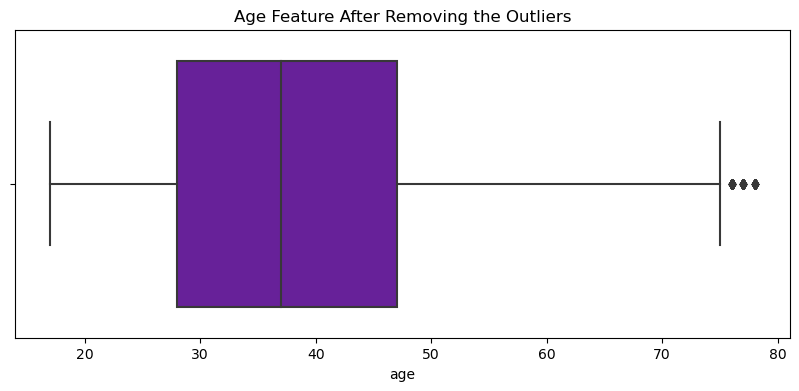

In [20]:
plt.figure(figsize=(10, 4))
sns.boxplot(x=df['age'],color = '#6A0DAD')
plt.title('Age Feature After Removing the Outliers')
plt.show()

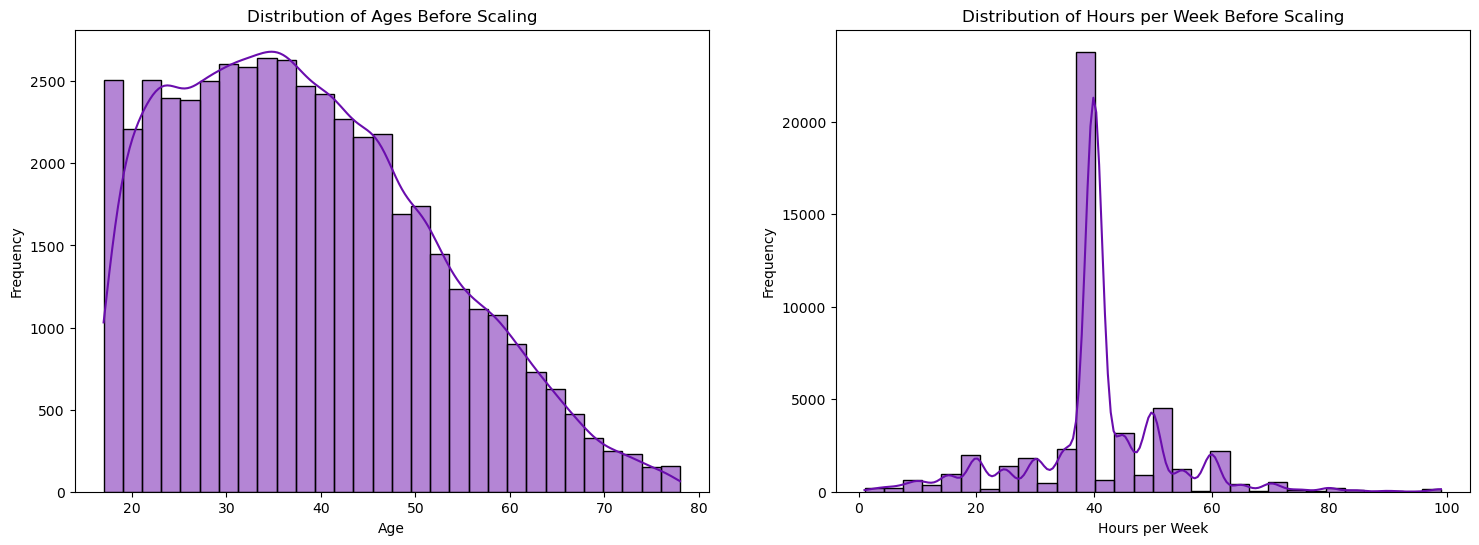

In [21]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# Distribution plot for 'age'
sns.histplot(df['age'], kde=True, bins=30, color = '#6A0DAD', ax=axes[0])
axes[0].set_title('Distribution of Ages Before Scaling')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frequency')

# Distribution plot for 'hours-per-week'
sns.histplot(df['hours-per-week'], kde=True, bins=30, color = '#6A0DAD', ax=axes[1])
axes[1].set_title('Distribution of Hours per Week Before Scaling')
axes[1].set_xlabel('Hours per Week')
axes[1].set_ylabel('Frequency')

plt.show()

In [22]:
feature_scale = df[['age']]
scaler = StandardScaler()
df['age'] = scaler.fit_transform(feature_scale[['age']])

In [23]:
feature_scale = df[['hours-per-week']]
scaler = StandardScaler()
df['hours-per-week'] = scaler.fit_transform(feature_scale[['hours-per-week']])

In [24]:
from sklearn.preprocessing import PolynomialFeatures
poly_features1 = df[['age']]
scaler = PolynomialFeatures(degree=2, include_bias=True)
poly_features_transformed1 = scaler.fit_transform(X=poly_features1)
poly_features_df1 = pd.DataFrame(poly_features_transformed1)
poly_features_df1.rename(columns={'0': 'Age0', '1': 'Age1', '2': 'Age2'}, inplace=True)
poly_features_df1

,0,1,2
0,1.0,-1.002898,1.005804
1,1.0,-0.033095,0.001095
2,1.0,-0.779097,0.606992
3,1.0,0.414506,0.171815
4,1.0,-0.331496,0.109889
...,...,...,...
48621,1.0,2.204911,4.861634
48622,1.0,0.712907,0.508237
48623,1.0,-0.853697,0.728799
48624,1.0,-1.375899,1.893097


In [25]:
poly_features2 = df[['hours-per-week']]
scaler = PolynomialFeatures(degree=2, include_bias=True)
poly_features_transformed2 = scaler.fit_transform(X=poly_features2)
poly_features_df2 = pd.DataFrame(poly_features_transformed2)
poly_features_df2.rename(columns={'0': 'hours-per-week0', '1': 'hours-per-week1', '2': 'hours-per-week2'}, inplace = True)
poly_features_df2

,0,1,2
0,1.0,-0.038739,0.001501
1,1.0,0.771708,0.595533
2,1.0,-0.038739,0.001501
3,1.0,-0.038739,0.001501
4,1.0,-0.849186,0.721116
...,...,...,...
48621,1.0,-0.038739,0.001501
48622,1.0,-0.038739,0.001501
48623,1.0,0.771708,0.595533
48624,1.0,-0.038739,0.001501


In [26]:
concatenated_df = pd.concat([poly_features_df1, poly_features_df2], axis=1)
column_order = [
    'Age0', 'Age1', 'Age2', 
    'hours-per-week0', 'hours-per-week1', 'hours-per-week2'
]

concatenated_df.columns = column_order
concatenated_df

,Age0,Age1,Age2,hours-per-week0,hours-per-week1,hours-per-week2
0,1.0,-1.002898,1.005804,1.0,-0.038739,0.001501
1,1.0,-0.033095,0.001095,1.0,0.771708,0.595533
2,1.0,-0.779097,0.606992,1.0,-0.038739,0.001501
3,1.0,0.414506,0.171815,1.0,-0.038739,0.001501
4,1.0,-0.331496,0.109889,1.0,-0.849186,0.721116
...,...,...,...,...,...,...
48621,1.0,2.204911,4.861634,1.0,-0.038739,0.001501
48622,1.0,0.712907,0.508237,1.0,-0.038739,0.001501
48623,1.0,-0.853697,0.728799,1.0,0.771708,0.595533
48624,1.0,-1.375899,1.893097,1.0,-0.038739,0.001501


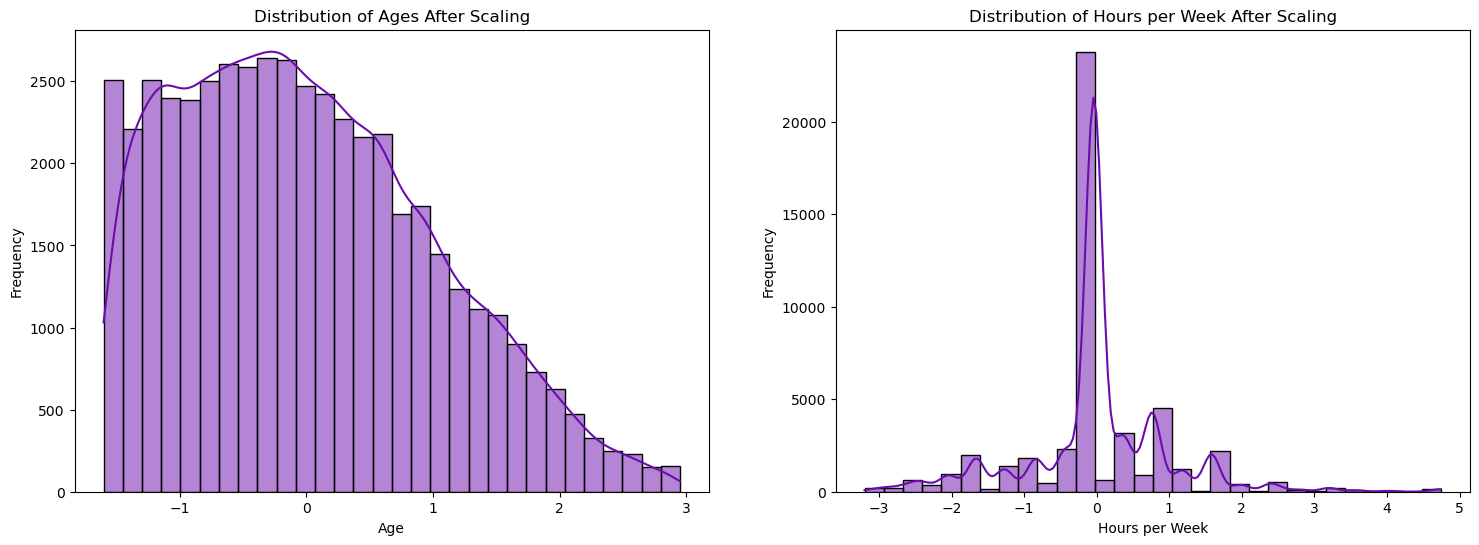

In [27]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# Distribution plot for 'age'
sns.histplot(df['age'], kde=True, bins=30, color = '#6A0DAD', ax=axes[0])
axes[0].set_title('Distribution of Ages After Scaling')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frequency')

# Distribution plot for 'hours-per-week'
sns.histplot(df['hours-per-week'], kde=True, bins=30, color = '#6A0DAD', ax=axes[1])
axes[1].set_title('Distribution of Hours per Week After Scaling')
axes[1].set_xlabel('Hours per Week')
axes[1].set_ylabel('Frequency')

plt.show()

<div style="text-align:center; background-color:#6A0DAD; padding:20px; border-radius:25px;">
  <h1 style="font-size:36px; color:#FFFFFF;"><b>4.Model Selection</b></h1>
</div>

In [28]:
df['gender'] = df['gender'].map({'Male': 1, 'Female': 0})

In [29]:
df.drop(['age', 'hours-per-week'], axis=1, inplace=True)
df

,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,native-country,income
0,Private,11th,7,single,Machine-op-inspct,Own-child,Black,1,United-States,0
1,Private,HS-grad,9,married,Farming-fishing,Husband,White,1,United-States,0
2,Local-gov,Assoc-acdm,12,married,Protective-serv,Husband,White,1,United-States,1
3,Private,Some-college,10,married,Machine-op-inspct,Husband,Black,1,United-States,1
5,Private,10th,6,single,Other-service,Not-in-family,White,1,United-States,0
...,...,...,...,...,...,...,...,...,...,...
42577,Self-emp-not-inc,7th-8th,4,single,Other-service,Not-in-family,White,0,United-States,0
42644,Private,Some-college,10,married,Craft-repair,Husband,White,1,United-States,1
44475,Private,Bachelors,13,married,Prof-specialty,Not-in-family,White,1,United-States,0
44969,Private,Some-college,10,single,Adm-clerical,Own-child,White,0,United-States,0


In [30]:
df.reset_index(inplace=True)
concatenated_df.reset_index(inplace=True)

In [31]:
df = pd.concat([df, concatenated_df], axis=1)
df.columns

Index(['index', 'workclass', 'education', 'educational-num', 'marital-status',
       'occupation', 'relationship', 'race', 'gender', 'native-country',
       'income', 'index', 'Age0', 'Age1', 'Age2', 'hours-per-week0',
       'hours-per-week1', 'hours-per-week2'],
      dtype='object')

In [32]:
columns_to_keep = ['workclass', 'educational-num', 'marital-status', 'occupation', 'gender', 'native-country', 'income', 'Age0', 'Age1', 'Age2' ,'hours-per-week0', 'hours-per-week1','hours-per-week2' ]
Features = df[columns_to_keep]

In [33]:
X= Features

X = pd.get_dummies(X, columns=['workclass', 'marital-status', 'occupation', 'native-country'])

X = X.drop(columns=['income'])
y = df['income']

x_train, x_test, y_train, y_test = train_test_split(X , y, test_size = 0.2)

In [34]:
print('the shape of the x train data is ' + str(x_test.shape))
print('the shape of the x test data is ' + str(y_test.shape))

the shape of the x train data is (9726, 74)
the shape of the x test data is (9726,)


In [35]:
Features

,workclass,educational-num,marital-status,occupation,gender,native-country,income,Age0,Age1,Age2,hours-per-week0,hours-per-week1,hours-per-week2
0,Private,7,single,Machine-op-inspct,1,United-States,0,1.0,-1.002898,1.005804,1.0,-0.038739,0.001501
1,Private,9,married,Farming-fishing,1,United-States,0,1.0,-0.033095,0.001095,1.0,0.771708,0.595533
2,Local-gov,12,married,Protective-serv,1,United-States,1,1.0,-0.779097,0.606992,1.0,-0.038739,0.001501
3,Private,10,married,Machine-op-inspct,1,United-States,1,1.0,0.414506,0.171815,1.0,-0.038739,0.001501
4,Private,6,single,Other-service,1,United-States,0,1.0,-0.331496,0.109889,1.0,-0.849186,0.721116
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48621,Self-emp-not-inc,4,single,Other-service,0,United-States,0,1.0,2.204911,4.861634,1.0,-0.038739,0.001501
48622,Private,10,married,Craft-repair,1,United-States,1,1.0,0.712907,0.508237,1.0,-0.038739,0.001501
48623,Private,13,married,Prof-specialty,1,United-States,0,1.0,-0.853697,0.728799,1.0,0.771708,0.595533
48624,Private,10,single,Adm-clerical,0,United-States,0,1.0,-1.375899,1.893097,1.0,-0.038739,0.001501


In [36]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [37]:
model.score(x_test, y_test)

0.8331276989512647

In [40]:
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier()
DTC.fit(x_train, y_train)

DecisionTreeClassifier()

In [41]:
DTC.score(x_test, y_test)

0.7848036191651244

In [60]:
path = DTC.cost_complexity_pruning_path(x_train, y_train)
alphas = path.ccp_alphas
alphas = alphas[:-1]
# take the abs value for alphs
alphas = np.abs(alphas)
#sort alphas
alphas = np.sort(alphas)
models = []

arr = []
for i in range(0,60):
    alpha = alphas[np.random.randint(100, len(alphas)- 1)]
    arr.append(alpha)
    DTC = DecisionTreeClassifier(random_state=0, ccp_alpha=alpha)
    DTC.fit(x_train, y_train)
    models.append(DTC)

In [61]:
train_score = [DTC_.score(x_train, y_train) for DTC_ in models]
test_score = [DTC_.score(x_test, y_test) for DTC_ in models]

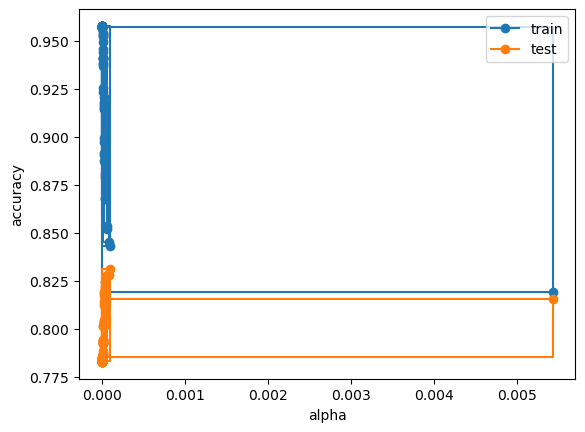

In [62]:
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.plot(arr, train_score, marker="o", label="train", drawstyle="steps-post")
ax.plot(arr, test_score, marker="o", label="test", drawstyle="steps-post")
plt.legend()
plt.show()

In [66]:
df[df['income'] == '<=50K']

,index,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,native-country,income,index,Age0,Age1,Age2,hours-per-week0,hours-per-week1,hours-per-week2


In [67]:
input_df = pd.read_csv(r"C:\Users\ziadz\Desktop\2024-03-07T15-31_export.csv")
input_df.drop(input_df.columns[0], axis=1, inplace=True)

In [68]:
new_row = {'age':'32', 'workclass': 'Private', 'educational-num': 14, 'marital-status': 'single', 'occupation': 'Tech-support', 'gender': 1, 'hours-per-week': 40,'native-country': 'United-States'}

input_df = input_df.append(new_row, ignore_index=True)

In [69]:
input_df

,age,workclass,educational-num,marital-status,occupation,gender,hours-per-week,native-country
0,24,Private,4,single,Handlers-cleaners,1,40,United-States
1,32,Private,14,single,Tech-support,1,40,United-States


In [70]:
import joblib

import warnings
warnings.filterwarnings('ignore')

# Load the pre-trained model
model = joblib.load('model.pkl')

In [71]:
input_df.columns =['age', 'workclass', 'educational-num', 'marital-status', 'occupation', 'gender', 'hours-per-week', 'native-country']
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
def preprocess_data(df):
    # Polynomial features for 'Age'
    poly_features1 = df[['age']]
    scaler = PolynomialFeatures(degree=2, include_bias=True)
    poly_features_transformed1 = scaler.fit_transform(X=poly_features1)
    poly_features_df1 = pd.DataFrame(poly_features_transformed1, columns=['Age0', 'Age1', 'Age2'])

    # Polynomial features for 'Hours_per_Week'
    poly_features2 = df[['hours-per-week']]
    scaler = PolynomialFeatures(degree=2, include_bias=True)
    poly_features_transformed2 = scaler.fit_transform(X=poly_features2)
    poly_features_df2 = pd.DataFrame(poly_features_transformed2, columns=['hours-per-week0', 'hours-per-week1', 'hours-per-week2'])

    # Concatenate the polynomial features
    concatenated_df = pd.concat([poly_features_df1, poly_features_df2], axis=1)

    # Standardize 'Age' and 'Hours_per_Week'
    scaler = StandardScaler()
    df['age'] = scaler.fit_transform(df[['age']])
    df['hours-per-week'] = scaler.fit_transform(df[['hours-per-week']])

    # Drop the original 'Age' and 'Hours_per_Week' columns
    df.drop(['age', 'hours-per-week'], axis=1, inplace=True)

    # Concatenate the original DataFrame with the polynomial features DataFrame
    df = pd.concat([df, concatenated_df], axis=1)

    # Select the columns to keep
    columns_to_keep = ['workclass', 'educational-num', 'marital-status', 'occupation', 'gender', 'native-country',  'Age0', 'Age1', 'Age2' ,'hours-per-week0', 'hours-per-week1','hours-per-week2' ]
    df = df[columns_to_keep]

    return df

# Use the function to preprocess df1
df_transformed = preprocess_data(input_df.copy())
df_transformed
def align_dataframe(df, model_columns):
    # Create a new DataFrame with the same number of rows, filled with zeros
    aligned_df = pd.DataFrame(0, index=np.arange(len(df)), columns=model_columns)

    # For the specified columns, check if the values match the column names in model_columns
    for column in ['workclass', 'marital-status', 'occupation', 'native-country']:
        if column in df.columns:
            for index, value in df[column].iteritems():
                column_name = f"{column}_{value}"
                if column_name in model_columns:
                    aligned_df.at[index, column_name] = 1

    # For the other columns, just assign the values from df_transformed
    other_columns = list(set(df.columns) - set(['workclass', 'marital-status', 'occupation', 'native-country']))
    aligned_df[other_columns] = df[other_columns]

    # Drop the original columns
    aligned_df.drop(['workclass', 'marital-status', 'occupation', 'native-country'], axis=1, inplace=True, errors='ignore')

    return aligned_df
# Use the function to align df_transformed


# Use the function to align df_transformed
model_columns = ['educational-num', 'gender', 'Age0', 'Age1', 'Age2',
       'hours-per-week0', 'hours-per-week1', 'hours-per-week2',
       'workclass_Federal-gov', 'workclass_Local-gov',
       'workclass_Never-worked', 'workclass_Private',
       'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc',
       'workclass_State-gov', 'workclass_Without-pay',
       'marital-status_divorced', 'marital-status_married',
       'marital-status_single', 'occupation_Adm-clerical',
       'occupation_Armed-Forces', 'occupation_Craft-repair',
       'occupation_Exec-managerial', 'occupation_Farming-fishing',
       'occupation_Handlers-cleaners', 'occupation_Machine-op-inspct',
       'occupation_Other-service', 'occupation_Priv-house-serv',
       'occupation_Prof-specialty', 'occupation_Protective-serv',
       'occupation_Sales', 'occupation_Tech-support',
       'occupation_Transport-moving', 'native-country_Cambodia',
       'native-country_Canada', 'native-country_China',
       'native-country_Columbia', 'native-country_Cuba',
       'native-country_Dominican-Republic', 'native-country_Ecuador',
       'native-country_El-Salvador', 'native-country_England',
       'native-country_France', 'native-country_Germany',
       'native-country_Greece', 'native-country_Guatemala',
       'native-country_Haiti', 'native-country_Holand-Netherlands',
       'native-country_Honduras', 'native-country_Hong',
       'native-country_Hungary', 'native-country_India',
       'native-country_Iran', 'native-country_Ireland',
       'native-country_Italy', 'native-country_Jamaica',
       'native-country_Japan', 'native-country_Laos',
       'native-country_Mexico', 'native-country_Nicaragua',
       'native-country_Peru', 'native-country_Philippines',
       'native-country_Poland', 'native-country_Portugal',
       'native-country_Puerto-Rico', 'native-country_Scotland',
       'native-country_South', 'native-country_Taiwan',
       'native-country_Thailand', 'native-country_Trinadad&Tobago',
       'native-country_US Minor Islands', 'native-country_United-States',
       'native-country_Vietnam', 'native-country_Yugoslavia']

df_aligned = align_dataframe(df_transformed, model_columns)

# Predict the income category
prediction = model.predict(df_aligned)

In [72]:
input_df

,age,workclass,educational-num,marital-status,occupation,gender,hours-per-week,native-country
0,24,Private,4,single,Handlers-cleaners,1,40,United-States
1,32,Private,14,single,Tech-support,1,40,United-States


In [73]:
prediction

array([0, 0], dtype=int64)

In [74]:
# count the values in the prediction
prediction = model.predict(x_test)
unique, counts = np.unique(prediction, return_counts=True)
print(np.asarray((unique, counts)).T)

[[   0 7878]
 [   1 1848]]


In [75]:
# print the classification report
print(classification_report(y_test, prediction))


              precision    recall  f1-score   support

           0       0.87      0.93      0.90      7391
           1       0.71      0.57      0.63      2335

    accuracy                           0.84      9726
   macro avg       0.79      0.75      0.77      9726
weighted avg       0.83      0.84      0.83      9726



In [76]:
# print x_test values where perdiction is 1
# one row of it
print(x_test[prediction == 1].iloc[0])
# store in a df
df11 = x_test[prediction == 1]

educational-num                    12.000000
gender                              1.000000
Age0                                1.000000
Age1                                0.116105
Age2                                0.013480
                                     ...    
native-country_Trinadad&Tobago      0.000000
native-country_US Minor Islands     0.000000
native-country_United-States        1.000000
native-country_Vietnam              0.000000
native-country_Yugoslavia           0.000000
Name: 6669, Length: 74, dtype: float64


In [77]:
df11

,educational-num,gender,Age0,Age1,Age2,hours-per-week0,hours-per-week1,hours-per-week2,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,marital-status_divorced,marital-status_married,marital-status_single,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,native-country_Cambodia,native-country_Canada,native-country_China,native-country_Columbia,native-country_Cuba,native-country_Dominican-Republic,native-country_Ecuador,native-country_El-Salvador,native-country_England,native-country_France,native-country_Germany,native-country_Greece,native-country_Guatemala,native-country_Haiti,native-country_Holand-Netherlands,native-country_Honduras,native-country_Hong,native-country_Hungary,native-country_India,native-country_Iran,native-country_Ireland,native-country_Italy,native-country_Jamaica,native-country_Japan,native-country_Laos,native-country_Mexico,native-country_Nicaragua,native-country_Peru,native-country_Philippines,native-country_Poland,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_US Minor Islands,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
6669,12,1,1.0,0.116105,0.013480,1.0,1.987378,3.949671,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
29214,13,1,1.0,0.638307,0.407436,1.0,0.366484,0.134311,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
14911,13,1,1.0,1.533509,2.351651,1.0,-0.038739,0.001501,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
16295,10,1,1.0,1.085908,1.179196,1.0,0.366484,0.134311,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
12496,13,1,1.0,0.339906,0.115536,1.0,-0.038739,0.001501,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30457,13,1,1.0,1.011308,1.022744,1.0,-0.849186,0.721116,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
11729,13,0,1.0,0.116105,0.013480,1.0,-1.659633,2.754380,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
37339,13,1,1.0,0.265306,0.070387,1.0,0.366484,0.134311,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
22689,13,1,1.0,1.757310,3.088138,1.0,-0.038739,0.001501,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [78]:
df.iloc[21125]

index                      22958
workclass                Private
education              Bachelors
educational-num               13
marital-status           married
occupation          Tech-support
relationship                Wife
race                       White
gender                         0
native-country     United-States
income                         1
index                      21125
Age0                         1.0
Age1                    0.190706
Age2                    0.036369
hours-per-week0              1.0
hours-per-week1        -1.254409
hours-per-week2         1.573542
Name: 21125, dtype: object